<a href="https://colab.research.google.com/github/SnehaSanjana/Machine-Learning-/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv("/content/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
categorical_cols= df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [5]:
for cols in categorical_cols.columns:
    print(cols,'-', len(categorical_cols[cols].unique()),'Labels')

Sex - 2 Labels
ChestPainType - 4 Labels
RestingECG - 3 Labels
ExerciseAngina - 2 Labels
ST_Slope - 3 Labels


In [6]:
train, test = train_test_split(df,test_size=0.3,random_state= 1234)
labels = [x for x in train.ChestPainType.value_counts().index]
values = train.ChestPainType.value_counts()

In [7]:
train['Sex'] = np.where(train['Sex'] == "M", 0, 1)
train['ExerciseAngina'] = np.where(train['ExerciseAngina'] == "N", 0, 1)
test['Sex'] = np.where(test['Sex'] == "M", 0, 1)
test['ExerciseAngina'] = np.where(test['ExerciseAngina'] == "N", 0, 1)

In [8]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [9]:
x_train=train.drop(['HeartDisease'],1)
x_test=test.drop(['HeartDisease'],1)

y_train=train['HeartDisease']
y_test=test['HeartDisease']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [10]:
print(x_train.shape)
print(x_test.shape)

(642, 18)
(276, 18)


In [11]:
model = LogisticRegression(max_iter=10000)
model1=model.fit(x_train, y_train)
model1

LogisticRegression(max_iter=10000)

In [12]:
print("Train accuracy:",model1.score(x_train, y_train))

Train accuracy: 0.8582554517133957


In [13]:
print("Test accuracy:",model1.score(x_test,y_test))

Test accuracy: 0.894927536231884


In [14]:
y_pred = model.predict(x_test)

In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       114
           1       0.93      0.89      0.91       162

    accuracy                           0.89       276
   macro avg       0.89      0.90      0.89       276
weighted avg       0.90      0.89      0.90       276



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


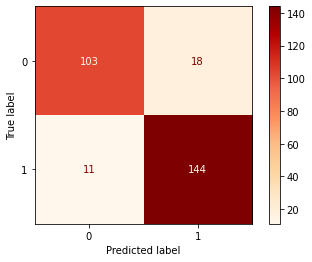

In [16]:
confusion_matrix = plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.OrRd)
